# Detección de Fraude con Tarjetas de crédito
# Grupo 3
## Bruno Dueñas, Fernando Mejía, Mateo Córdova

# Importar librerías

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
import tensorflow as tf
import graphviz

## Importando la data proveniente del csv y mostrándo el contenido de la data

In [71]:
column_names = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order","fraud"]
dframe=pd.read_csv("data/card_transdata.csv")
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Encontrar las características que mejor describen los datos

In [72]:
dframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Copia para el modelo en keras

In [73]:
dframeKeras = dframe.copy()

## Copia para el arbol de decisión sklearn

In [74]:
dframeArbol = dframe.copy()

## Normalización de la data

In [75]:
scaler = StandardScaler()
dframe.iloc[:,0:-1] = scaler.fit_transform(dframe.iloc[:,0:-1].to_numpy())

In [76]:
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909,0.0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,0.366584,1.361576,-0.334458,-1.364425,0.0
999996,-0.103318,-0.091035,0.340808,0.366584,1.361576,-0.334458,-1.364425,0.0
999997,-0.362650,-0.137903,-0.573694,0.366584,1.361576,-0.334458,0.732909,0.0
999998,-0.342098,-0.185523,-0.481628,0.366584,-0.734443,-0.334458,0.732909,0.0


## Revisar valores nulos (de existir)

In [77]:
dframe.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Recuentos de valores para variables categóricas (repeat_retailer, used_chip, used_pin_number, online_order y fraude)

In [78]:
for column in dframe.columns[3:9]:
    print(dframe[column].value_counts())
    print()

 0.366584    881536
-2.727890    118464
Name: repeat_retailer, dtype: int64

-0.734443    649601
 1.361576    350399
Name: used_chip, dtype: int64

-0.334458    899392
 2.989911    100608
Name: used_pin_number, dtype: int64

 0.732909    650552
-1.364425    349448
Name: online_order, dtype: int64

0.0    912597
1.0     87403
Name: fraud, dtype: int64



## Matriz de correlación entre la data

<AxesSubplot:>

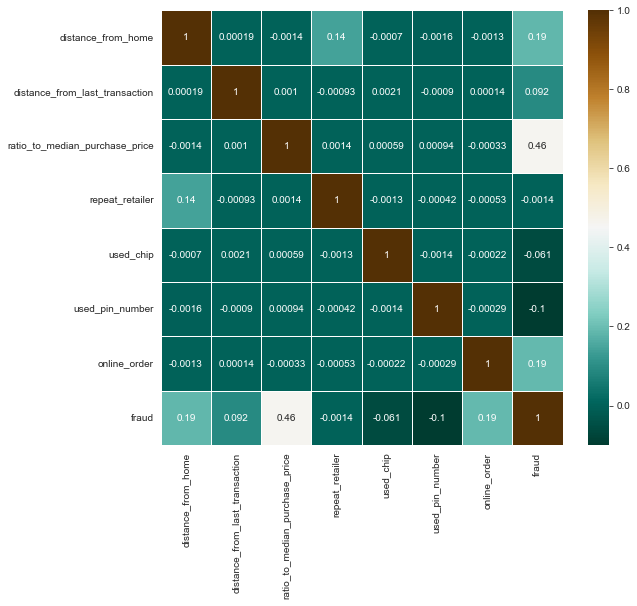

In [79]:
correlation_mat = dframe.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'BrBG_r',linewidths=0.5)

### Análisis univariado para eliminar la característica que tiene el menor efecto en la variable objetivo (fraude)

In [80]:
scores = []
Univ_Analysis = SelectKBest(score_func=f_classif, k=7)
fit = Univ_Analysis.fit(dframe[dframe.columns[0:7]], dframe[dframe.columns[7]])
newcols = Univ_Analysis.get_support(indices=True)
for i in range(7):
    print ("Caracterisicas:  ",column_names[i], ", Puntuación: ", fit.scores_[i])
    scores.append(fit.scores_[i])
print("Más baja = ",min(scores))

Caracterisicas:   distance_from_home , Puntuación:  36465.69332586085
Caracterisicas:   distance_from_last_transaction , Puntuación:  8520.690791240206
Caracterisicas:   ratio_to_median_purchase_price , Puntuación:  271820.173833205
Caracterisicas:   repeat_retailer , Puntuación:  1.8426704992520047
Caracterisicas:   used_chip , Puntuación:  3731.7684653980787
Caracterisicas:   used_pin_number , Puntuación:  10160.776030233745
Caracterisicas:   online_order , Puntuación:  38263.51828118835
Más baja =  1.8426704992520047


### Dado que tenemos la puntuación más baja para repeat_retailer, la excluimos de nuestro análisis.

In [81]:
dframe.drop(['repeat_retailer'], axis=1, inplace=True)

## Separar la data en variables de entrenamiento y variables de prueba

In [82]:
train, test = train_test_split(dframe, test_size=0.2)

## Variables de entrenamiento y variables de prueba

In [83]:
t_data = train[train.columns[0:6]]
t_target = train[train.columns[6]]
w_test = test[test.columns[0:6]]
w_true = test[test.columns[6]] #Para validar el accuracy

In [84]:
w_true

654067    0.0
389111    0.0
694283    0.0
963522    0.0
631896    0.0
         ... 
787123    0.0
860417    0.0
321292    1.0
832528    0.0
398296    0.0
Name: fraud, Length: 200000, dtype: float64

In [85]:
t_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order
543647,-0.399029,0.017616,0.243050,1.361576,-0.334458,0.732909
114643,0.177072,-0.074118,-0.441066,1.361576,-0.334458,0.732909
766487,-0.254523,-0.162432,-0.421286,-0.734443,-0.334458,0.732909
566194,-0.067695,-0.151023,-0.275428,1.361576,-0.334458,0.732909
342429,0.426237,-0.187494,-0.618747,-0.734443,-0.334458,0.732909
...,...,...,...,...,...,...
839792,0.037011,-0.139287,-0.552621,-0.734443,-0.334458,0.732909
972055,-0.280591,-0.193896,-0.420823,-0.734443,-0.334458,0.732909
887638,-0.387936,-0.189551,-0.453538,-0.734443,-0.334458,0.732909
642377,-0.344939,-0.177295,-0.097596,-0.734443,-0.334458,0.732909


## Arbol de decisión sklearn
### Entrenamiento del modelo

In [86]:
dframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,1.361576,-0.334458,0.732909,0.0


In [87]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(t_data, t_target)

## Graficar el arbol de decisión

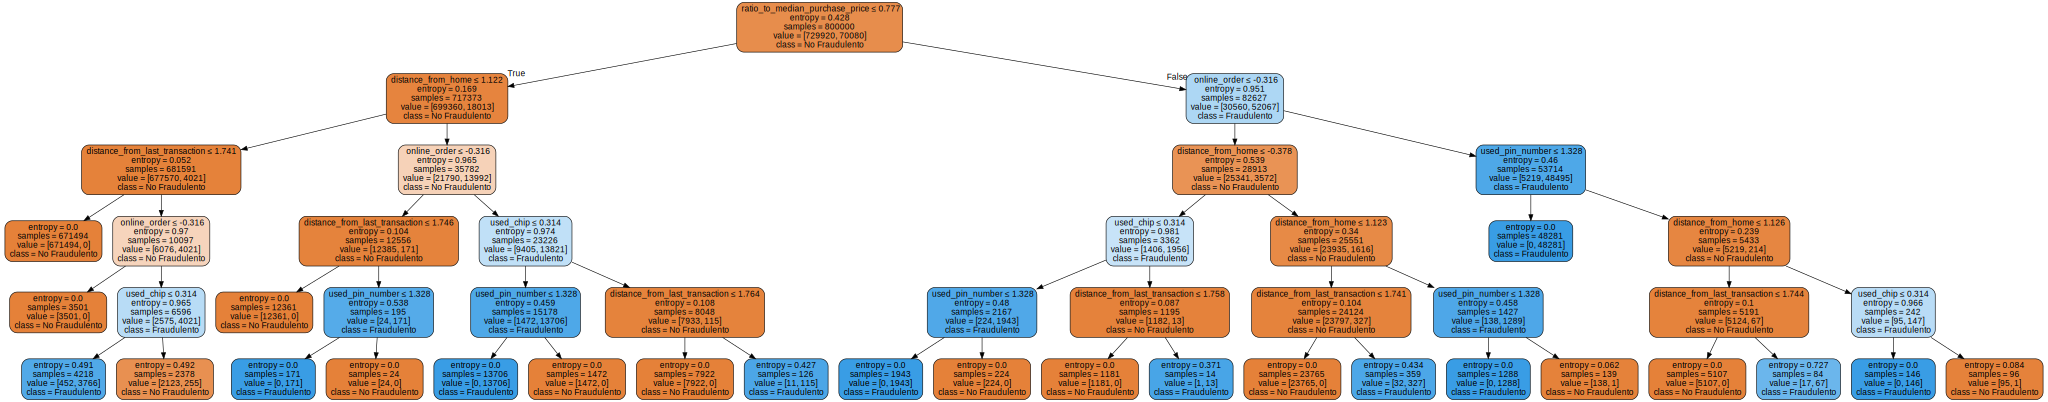

In [88]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Fraudulento", "Fraudulento"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Predicción de la data con el arbol de decisión sklearn

In [89]:
y_respuesta = clf.predict(w_test)

In [90]:
y_respuesta

array([0., 0., 0., ..., 1., 0., 0.])

In [91]:
acc = metrics.accuracy_score(w_true, y_respuesta, normalize=True, sample_weight=None)
print('Accuracy del árbol de decisión: {}%'.format(acc * 100))

Accuracy del árbol de decisión: 99.9015%


In [92]:
metrics.confusion_matrix(w_true, y_respuesta)

array([[182549,    128],
       [    69,  17254]], dtype=int64)

## Arbol de decisión sin tratamiento de datos

In [93]:
dframeArbol.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [94]:
trainSin, testSin = train_test_split(dframeArbol, test_size=0.2)

In [95]:
t_data = trainSin[trainSin.columns[0:7]]
t_target = trainSin[trainSin.columns[7]]
w_test = testSin[testSin.columns[0:7]]
w_true = testSin[testSin.columns[7]]  #Para validar el accuracy

In [96]:
w_true

365917    0.0
865977    0.0
723396    0.0
795628    0.0
231178    0.0
         ... 
276263    0.0
616150    0.0
372750    0.0
871977    0.0
803848    0.0
Name: fraud, Length: 200000, dtype: float64

In [97]:
t_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
83014,5.750149,0.451404,2.171041,1.0,1.0,0.0,0.0
54691,1.076483,0.601466,0.269436,0.0,0.0,0.0,1.0
924726,84.874269,16.744011,1.504644,1.0,1.0,1.0,1.0
907919,6.614307,0.054305,0.231947,1.0,0.0,0.0,1.0
792671,26.557452,0.268642,0.932995,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
852814,4.913850,0.088073,0.596561,1.0,0.0,0.0,0.0
888818,5.676146,41.846541,1.269706,1.0,1.0,1.0,1.0
684838,2.245182,0.198671,6.824065,1.0,0.0,0.0,0.0
133266,0.116842,1.842908,4.856862,0.0,0.0,0.0,1.0


## Arbol de decisión sklearn
### Entrenamiento del modelo (Sin tratamiento de data)

In [98]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(t_data, t_target)

## Graficar el arbol de decisión

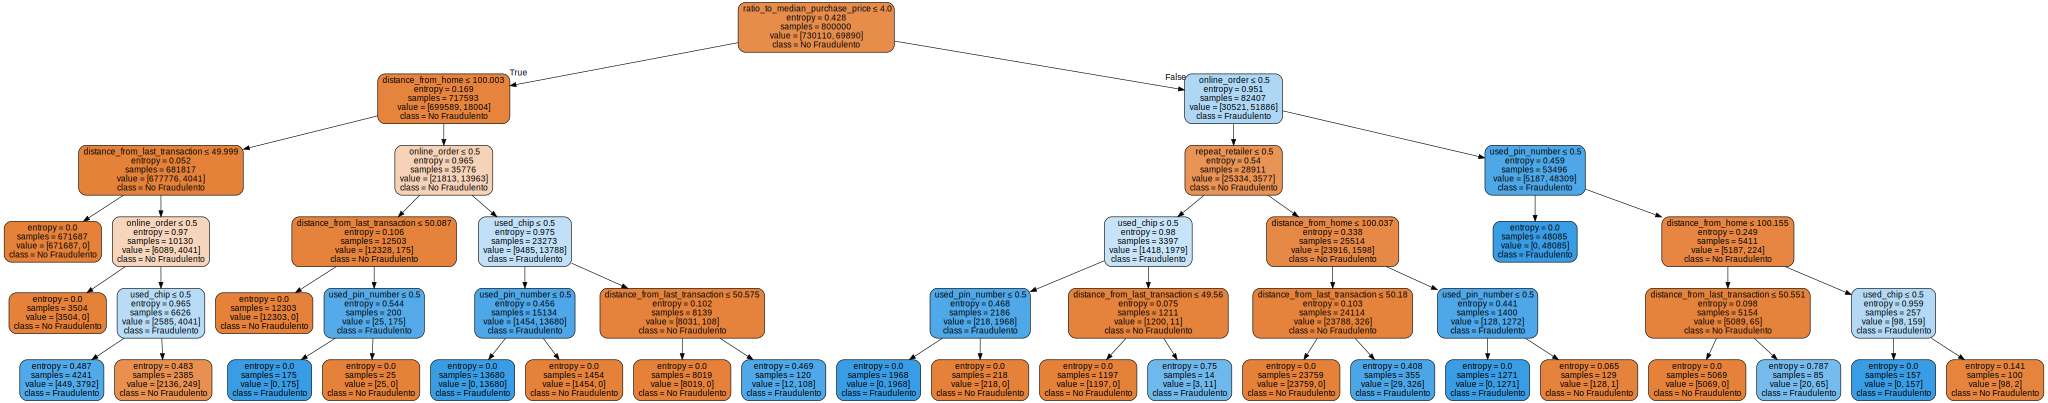

In [99]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(t_data.columns.values),
                                class_names=["No Fraudulento", "Fraudulento"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Predicción de la data con el arbol de decisión sklearn

In [100]:
y_respuesta = clf.predict(w_test)

In [101]:
y_respuesta

array([0., 0., 0., ..., 0., 0., 0.])

In [102]:
acc = metrics.accuracy_score(w_true, y_respuesta, normalize=True, sample_weight=None)
print('Accuracy del árbol de decisión: {}%'.format(acc * 100))

Accuracy del árbol de decisión: 99.90050000000001%


In [103]:
metrics.confusion_matrix(w_true, y_respuesta)

array([[182357,    130],
       [    69,  17444]], dtype=int64)

# Modelo Neuronal con Keras

In [104]:
modelScores = []

In [105]:
scaler = StandardScaler()
dframeKeras.iloc[:,0:-1] = scaler.fit_transform(dframeKeras.iloc[:,0:-1].to_numpy())

## Separar la data en variables de entrenamiento y variables de prueba

In [106]:
trainKeras, testKeras = train_test_split(dframeKeras, test_size=0.2)

## Definir data y target

In [107]:
t_data = trainKeras[trainKeras.columns[0:7]]
t_target = trainKeras[trainKeras.columns[7]]
w_test = testKeras[testKeras.columns[0:7]].iloc[10:50]
w_true = testKeras[testKeras.columns[7]].iloc[10:50]  #Para validar el accuracy

## Crear el modelo de la red neuronal

In [108]:
def get_basic_model(learning_rate):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

## Entrenar el modelo 1 con aprendizaje 0.01

In [109]:
model = get_basic_model(0.01)
historial = model.fit(t_data, t_target, epochs=5, verbose=True)

Epoch 1/5
25000/25000 [==============================] - 14s 561us/step - loss: 0.0177 - accuracy: 0.9933
Epoch 2/5
25000/25000 [==============================] - 14s 558us/step - loss: 0.0107 - accuracy: 0.9960
Epoch 3/5
25000/25000 [==============================] - 14s 560us/step - loss: 0.0094 - accuracy: 0.9966
Epoch 4/5
25000/25000 [==============================] - 14s 553us/step - loss: 0.0084 - accuracy: 0.9969
Epoch 5/5
25000/25000 [==============================] - 14s 557us/step - loss: 0.0080 - accuracy: 0.9972


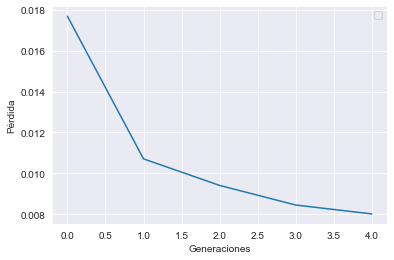

In [110]:
plt.legend('Modelo Keras 0.01')
plt.xlabel('Generaciones')
plt.ylabel('Pérdida')
plt.plot(historial.history['loss'])

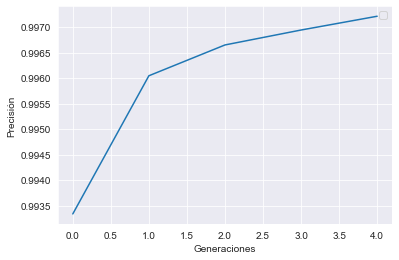

In [111]:
plt.legend('Modelo Keras 0.01')
plt.xlabel('Generaciones')
plt.ylabel('Precisión')
plt.plot(historial.history['accuracy'])

In [112]:
model.predict(w_test)

2/2 [==============================] - 0s 2ms/step


array([[ -18.497343 ],
       [ -40.18611  ],
       [ -17.83851  ],
       [ -70.03824  ],
       [  12.0769615],
       [ -28.813448 ],
       [ -19.767447 ],
       [ -28.425524 ],
       [ -49.54341  ],
       [ -74.88699  ],
       [ -35.029953 ],
       [ -43.776478 ],
       [ -39.395355 ],
       [ -32.81198  ],
       [ -51.10163  ],
       [ -34.190773 ],
       [ -82.986595 ],
       [ -69.47559  ],
       [ -28.433388 ],
       [ -41.99773  ],
       [ -40.61388  ],
       [ -21.673618 ],
       [ -14.404356 ],
       [-123.61497  ],
       [ -71.912575 ],
       [-194.83076  ],
       [ -30.635717 ],
       [   5.9657288],
       [ -64.90817  ],
       [ -19.48291  ],
       [ -62.568336 ],
       [ -17.623762 ],
       [ -27.689108 ],
       [ -23.69667  ],
       [ -68.344505 ],
       [ -18.780088 ],
       [ -29.790749 ],
       [ -42.531425 ],
       [ -20.146112 ],
       [-106.23522  ]], dtype=float32)

In [113]:
w_true

947182    0.0
40237     0.0
203707    0.0
520814    0.0
900651    1.0
295606    0.0
576254    0.0
806179    0.0
977856    0.0
531951    0.0
940636    0.0
549167    0.0
551344    0.0
472956    0.0
500287    0.0
328005    0.0
809283    0.0
122745    0.0
215623    0.0
53053     0.0
244316    0.0
249013    0.0
733314    0.0
190337    0.0
676562    0.0
168192    0.0
623141    0.0
591487    1.0
630675    0.0
662939    0.0
896180    0.0
487201    0.0
166118    0.0
981093    0.0
500106    0.0
717515    0.0
216355    0.0
340863    0.0
650283    0.0
633645    0.0
Name: fraud, dtype: float64

In [114]:
modelScores.append(model.evaluate(w_test, w_true))

2/2 [==============================] - 0s 2ms/step - loss: 6.4205e-05 - accuracy: 1.0000


## Entrenar el modelo 2 con aprendizaje 0.1

In [115]:
model = get_basic_model(0.1)
historial = model.fit(t_data, t_target, epochs=5, verbose=True)

Epoch 1/5
25000/25000 [==============================] - 14s 531us/step - loss: 0.0604 - accuracy: 0.9801
Epoch 2/5
25000/25000 [==============================] - 14s 554us/step - loss: 0.0626 - accuracy: 0.9828
Epoch 3/5
25000/25000 [==============================] - 15s 608us/step - loss: 0.0540 - accuracy: 0.9842
Epoch 4/5
25000/25000 [==============================] - 14s 547us/step - loss: 0.0648 - accuracy: 0.9848
Epoch 5/5
25000/25000 [==============================] - 14s 542us/step - loss: 0.0557 - accuracy: 0.9837


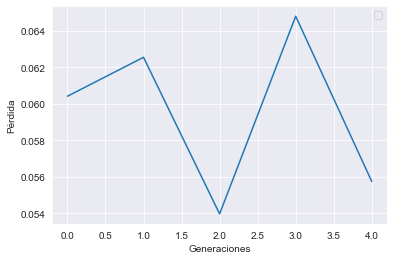

In [116]:
plt.legend('Modelo Keras 0.1')
plt.xlabel('Generaciones')
plt.ylabel('Pérdida')
plt.plot(historial.history['loss'])

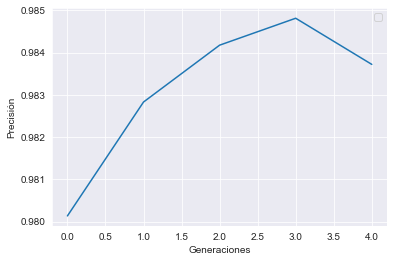

In [117]:
plt.legend('Modelo Keras 0.1')
plt.xlabel('Generaciones')
plt.ylabel('Precisión')
plt.plot(historial.history['accuracy'])

In [118]:
model.predict(w_test)

2/2 [==============================] - 0s 2ms/step


array([[  -78.70333  ],
       [  -88.372826 ],
       [ -727.0263   ],
       [ -410.3853   ],
       [    2.7898667],
       [   -4.1970444],
       [  -37.55499  ],
       [   -4.1970444],
       [ -608.52106  ],
       [-1220.0238   ],
       [  -35.332134 ],
       [-2224.2537   ],
       [-1037.6012   ],
       [  -19.111067 ],
       [ -687.30786  ],
       [-1055.3451   ],
       [ -471.64178  ],
       [-1629.9896   ],
       [ -216.79715  ],
       [ -108.22969  ],
       [  -95.23407  ],
       [ -955.5133   ],
       [  -40.116264 ],
       [-1165.8184   ],
       [-1203.0277   ],
       [-2201.508    ],
       [ -120.81371  ],
       [    2.7898667],
       [ -437.22443  ],
       [  -64.12645  ],
       [ -632.6818   ],
       [  -65.107155 ],
       [ -199.57954  ],
       [ -107.54587  ],
       [-1052.9108   ],
       [  -56.149536 ],
       [ -245.69775  ],
       [ -111.8745   ],
       [ -108.94856  ],
       [-1959.734    ]], dtype=float32)

In [119]:
w_true

947182    0.0
40237     0.0
203707    0.0
520814    0.0
900651    1.0
295606    0.0
576254    0.0
806179    0.0
977856    0.0
531951    0.0
940636    0.0
549167    0.0
551344    0.0
472956    0.0
500287    0.0
328005    0.0
809283    0.0
122745    0.0
215623    0.0
53053     0.0
244316    0.0
249013    0.0
733314    0.0
190337    0.0
676562    0.0
168192    0.0
623141    0.0
591487    1.0
630675    0.0
662939    0.0
896180    0.0
487201    0.0
166118    0.0
981093    0.0
500106    0.0
717515    0.0
216355    0.0
340863    0.0
650283    0.0
633645    0.0
Name: fraud, dtype: float64

In [120]:
modelScores.append(model.evaluate(w_test, w_true))

2/2 [==============================] - 0s 943us/step - loss: 0.0037 - accuracy: 1.0000


## Entrenar el modelo 3 con aprendizaje 0.5

In [121]:
## Entrenar el modelo 2 con aprendizaje 0.1
model = get_basic_model(0.5)
historial = model.fit(t_data, t_target, epochs=5, verbose=True)

Epoch 1/5
25000/25000 [==============================] - 15s 578us/step - loss: 0.3010 - accuracy: 0.9125
Epoch 2/5
25000/25000 [==============================] - 14s 573us/step - loss: 0.3020 - accuracy: 0.9125
Epoch 3/5
25000/25000 [==============================] - 14s 562us/step - loss: 0.3022 - accuracy: 0.9125
Epoch 4/5
25000/25000 [==============================] - 15s 610us/step - loss: 0.3026 - accuracy: 0.9125
Epoch 5/5
25000/25000 [==============================] - 14s 565us/step - loss: 0.3021 - accuracy: 0.9125


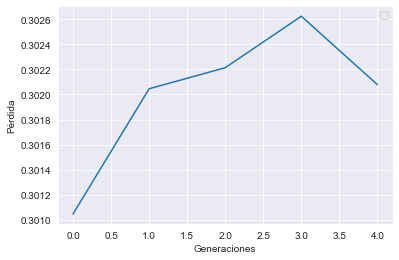

In [122]:
plt.legend('Modelo Keras 0.5')
plt.xlabel('Generaciones')
plt.ylabel('Pérdida')
plt.plot(historial.history['loss'])

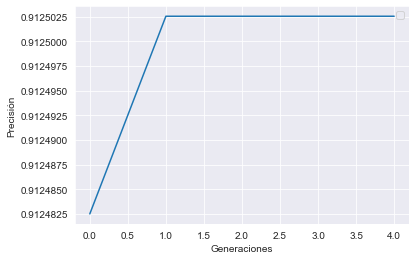

In [123]:
plt.legend('Modelo Keras 0.5')
plt.xlabel('Generaciones')
plt.ylabel('Precisión')
plt.plot(historial.history['accuracy'])

In [124]:
model.predict(w_test)

2/2 [==============================] - 0s 991us/step


array([[-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225],
       [-2.2892225]], dtype=float32)

In [125]:
w_true

947182    0.0
40237     0.0
203707    0.0
520814    0.0
900651    1.0
295606    0.0
576254    0.0
806179    0.0
977856    0.0
531951    0.0
940636    0.0
549167    0.0
551344    0.0
472956    0.0
500287    0.0
328005    0.0
809283    0.0
122745    0.0
215623    0.0
53053     0.0
244316    0.0
249013    0.0
733314    0.0
190337    0.0
676562    0.0
168192    0.0
623141    0.0
591487    1.0
630675    0.0
662939    0.0
896180    0.0
487201    0.0
166118    0.0
981093    0.0
500106    0.0
717515    0.0
216355    0.0
340863    0.0
650283    0.0
633645    0.0
Name: fraud, dtype: float64

In [126]:
modelScores.append(model.evaluate(w_test, w_true))

2/2 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9500


## Comparar los modelos con el accuracy

In [131]:
for score in modelScores:
  print('Precisión: {}  Pérdida: {}'.format(score[1], score[0]))

Precisión: 1.0  Pérdida: 6.420497811632231e-05
Precisión: 1.0  Pérdida: 0.003727223724126816
Precisión: 0.949999988079071  Pérdida: 0.21099348366260529
